<a href="https://colab.research.google.com/github/2003Siddhant/Diabetes-Prediction/blob/main/Diabetes_Prediction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Diabetes Prediction

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
diabetes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')

In [29]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
# number of rows and Columns in this dataset
diabetes.shape

(768, 9)

In [31]:
# getting the statistical measures of the data
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [33]:
diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [34]:
# separating the data and labels
X = diabetes.drop(columns = 'Outcome', axis=1)
Y = diabetes['Outcome']

In [35]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [36]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


###Data Standardization

In [37]:
scaler = StandardScaler()

In [38]:
scaler.fit(X)

StandardScaler()

In [39]:
standardized_data = scaler.transform(X)

In [40]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [41]:
X = standardized_data
Y = diabetes['Outcome']

In [42]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [63]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.7727272727272727
[[88 12]
 [23 31]]
0.7209302325581395


###Training the model

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [77]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()

dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [78]:
clfs = {
    'SVC' : svc,
    'KN' : knc,

    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [79]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,Y_pred)
    precision = precision_score(Y_test,Y_pred)

    return accuracy,precision

In [80]:
train_classifier(xgb,X_train,Y_train,X_test,Y_test)

(0.7402597402597403, 0.6521739130434783)

In [81]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.6883116883116883
Precision -  0.5576923076923077
For  KN
Accuracy -  0.7207792207792207
Precision -  0.6486486486486487
For  DT
Accuracy -  0.7792207792207793
Precision -  0.7777777777777778
For  LR
Accuracy -  0.7597402597402597
Precision -  0.717948717948718
For  RF
Accuracy -  0.7337662337662337
Precision -  0.6666666666666666
For  AdaBoost
Accuracy -  0.7142857142857143
Precision -  0.6190476190476191
For  BgC
Accuracy -  0.7207792207792207
Precision -  0.6341463414634146
For  GBDT
Accuracy -  0.7337662337662337
Precision -  0.6666666666666666
For  xgb
Accuracy -  0.7402597402597403
Precision -  0.6521739130434783


In [82]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [83]:
performance_df

,Algorithm,Accuracy,Precision
2,DT,0.779221,0.777778
3,LR,0.759740,0.717949
4,RF,0.733766,0.666667
7,GBDT,0.733766,0.666667
8,xgb,0.740260,0.652174
1,KN,0.720779,0.648649
6,BgC,0.720779,0.634146
5,AdaBoost,0.714286,0.619048
0,SVC,0.688312,0.557692


In [85]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [86]:
performance_df1

,Algorithm,variable,value
0,DT,Accuracy,0.779221
1,LR,Accuracy,0.759740
2,RF,Accuracy,0.733766
3,GBDT,Accuracy,0.733766
4,xgb,Accuracy,0.740260
5,KN,Accuracy,0.720779
6,BgC,Accuracy,0.720779
7,AdaBoost,Accuracy,0.714286
8,SVC,Accuracy,0.688312
9,DT,Precision,0.777778


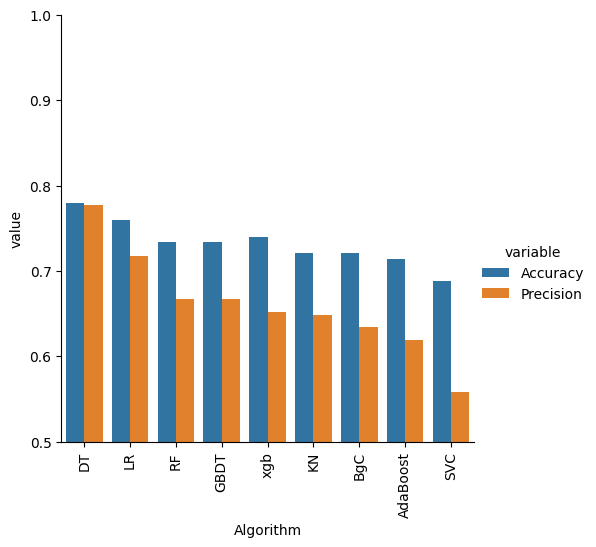

In [88]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()